In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, model_selection
import pandas as pd

In [3]:
data = pd.read_csv("ionosphere.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
X = data.iloc[:,0:33]
Y = data.iloc[:,34]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state = 0)

In [12]:
svc = svm.SVC(kernel='rbf', C=1).fit(X_train[[15,28]], y_train)
x_min = X.iloc[:,15].min()
x_max = X.iloc[:,15].max()
y_min = X.iloc[:,28].min()
y_max = X.iloc[:,28].max()
XX, YY = np.mgrid[ x_min : x_max :200j,  y_min : y_max :200j]
Z = svc.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

array([['b', 'b', 'b', ..., 'b', 'b', 'b'],
       ['b', 'b', 'b', ..., 'b', 'b', 'b'],
       ['b', 'b', 'b', ..., 'b', 'b', 'b'],
       ...,
       ['g', 'g', 'g', ..., 'b', 'b', 'b'],
       ['g', 'g', 'g', ..., 'b', 'b', 'b'],
       ['g', 'g', 'g', ..., 'b', 'b', 'b']], dtype=object)

TypeError: '>' not supported between instances of 'str' and 'int'

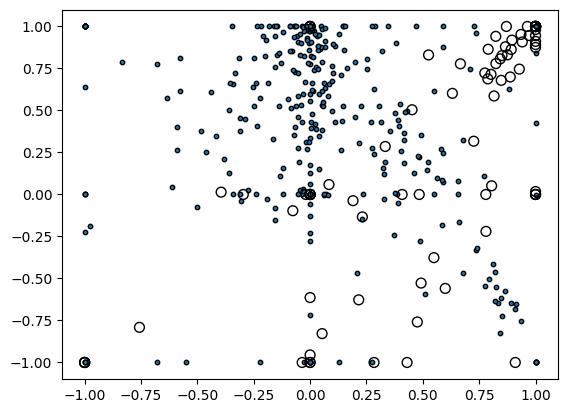

In [6]:
plt.figure()
plt.scatter(X.iloc[:,15],X.iloc[:,28],zorder=10,edgecolor='k', s=10)
plt.scatter(X_test.iloc[:,6:7],X_test.iloc[:,14:15],s=50,
            facecolors='none',zorder=10,edgecolor='k')
plt.axis('tight')
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


plt.show()